# Heavy Traffic Indicators I-94 

### We are going to analyze the I-94 dataset, so we can figure out how traffic is westbound.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [5]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/2012 9:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/2012 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/2012 13:00,4918


In [6]:
traffic.tail()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,9/30/2018 19:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,9/30/2018 20:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,9/30/2018 21:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,9/30/2018 22:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,9/30/2018 23:00,954


In [7]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We are going to create a histogram to get a gist of how traffic is going westbound on I-94

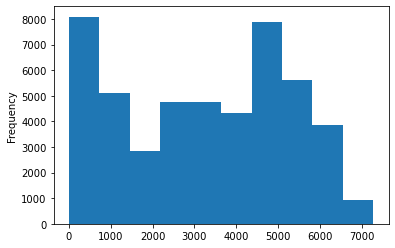

In [8]:
%matplotlib inline
traffic['traffic_volume'].plot.hist()
plt.show()

In [9]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Looks like from the histogram and describe(), we can say that 25% of the time there is less than or equal to 1193 cars and 25% of the time there is more than or equal to 4933 cars

In [10]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [11]:
traffic_day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)] 

In [12]:
traffic_night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

We have changed the 'date_time' column to date time and have made it display by the hour. Then, we split the data from day time (7am to 7pm) to night time (7pm - 7am).

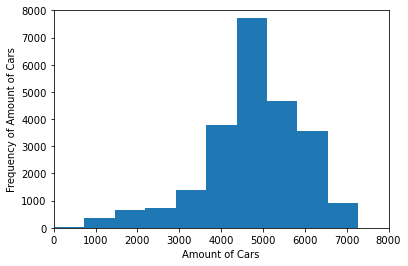

In [13]:
traffic_day['traffic_volume'].plot.hist()
plt.xlabel('Amount of Cars')
plt.ylabel('Frequency of Amount of Cars')
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.show()

In [14]:
traffic_day['traffic_volume'].describe()


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

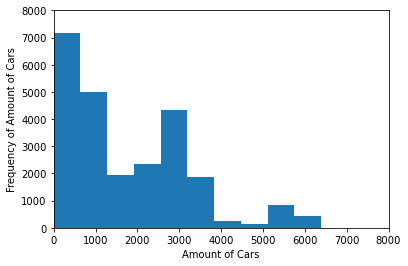

In [15]:
traffic_night['traffic_volume'].plot.hist()
plt.xlabel('Amount of Cars')
plt.ylabel('Frequency of Amount of Cars')
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.show()

In [16]:
traffic_night['traffic_volume'].describe()


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Looking at the graphs and the describe function, the data can be interpreted as traffic at night tends to be much less than traffic during the day. Traffic during the day has a mean of 4762 cars while traffic at night has a mean of 1785 cars. If we are going to look into heavy traffic, we can concentrate on the traffic during the day. 

In [17]:
traffic_day['month'] = traffic_day['date_time'].dt.month

In [18]:
traffic_by_month = traffic_day.groupby('month').mean()

In [19]:
traffic_by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


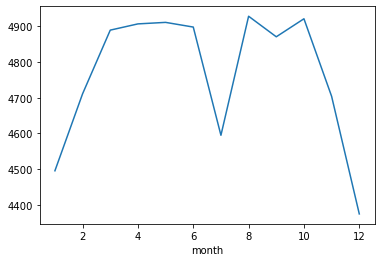

In [20]:
traffic_by_month['traffic_volume'].plot.line()
plt.show()